# Predicting Heart Disease by using Machine learning project

this notebook looks into various python-based machine-learning and datascience libraries in an attmept to build a machine learning
model capable pf prediciting Whehther a patient has heart disease based on his health attributes.

We 'r going to take the folloeing approach :
1.Problem Defination
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

## 1 Problem Defination
> for given data , we have to find out whether a person is suffering from heart_disease or not.

## 2 Data
The original data come from Cleavland data from UCI machine learning Repository.

there is also a version of it available on kaggle.

##3 Evaluation

if we can reach 95% accuracy at predicting whether a patient has a heart disease or not , we re finished.

## 4. Features
**Creaitng a dictionary**
    
* age in years
* sex (1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital) 
* cholserum cholestoral in mg/dl
* fbs (fasting blood sugar › 120 mg/dl) (1 = true; 0 = false) 
* restecgresting electrocardiographic results 
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest 
* slopethe slope of the peak exercise ST segment 
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1or 0

## Preparing the tools
we re going to import all the modules required

In [50]:
## importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , precision_score,f1_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

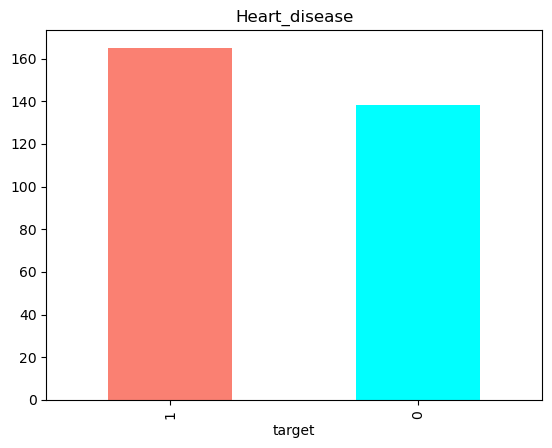

In [6]:
df.target.value_counts().plot(kind="bar",color=["salmon","cyan"]).set(title="Heart_disease");

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Diseasae frequency with respect to sex

In [10]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

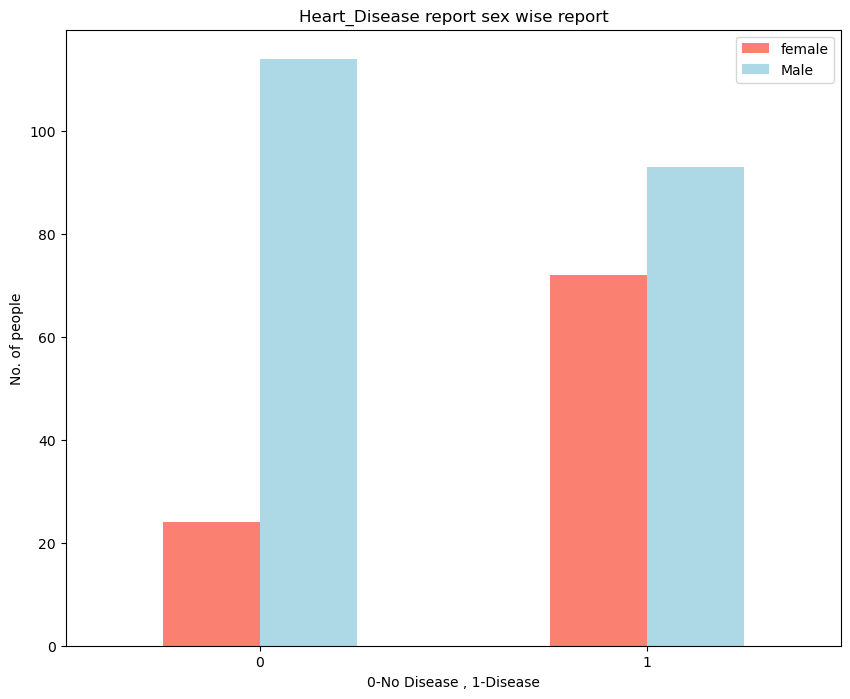

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  color=["salmon","lightblue"],
                                  figsize=(10,8))
plt.title("Heart_Disease report sex wise report")
plt.xlabel("0-No Disease , 1-Disease")
plt.ylabel("No. of people")
plt.legend(["female","Male"])
plt.xticks(rotation=0);

## heart disease with respect to age and thalach

In [13]:
pd.crosstab(df.age,df.target)

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2
39,1,3
40,2,1
41,1,9
42,1,7


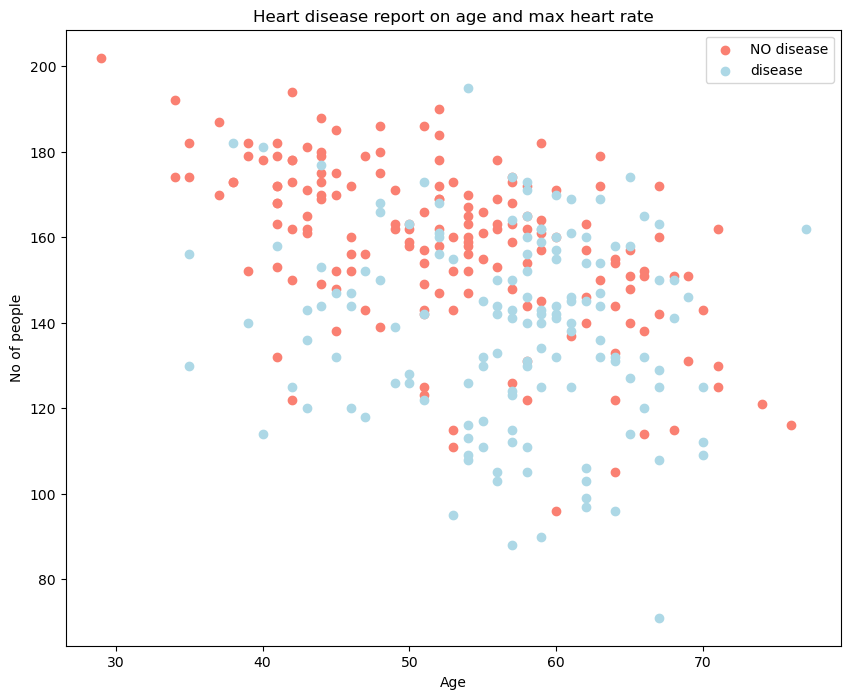

In [14]:
fig=plt.figure(figsize=(10,8))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("Heart disease report on age and max heart rate")
plt.xlabel("Age")
plt.ylabel("No of people")
plt.legend(["NO disease","disease"])
plt.xticks(rotation=0);

## same analysis using oo method

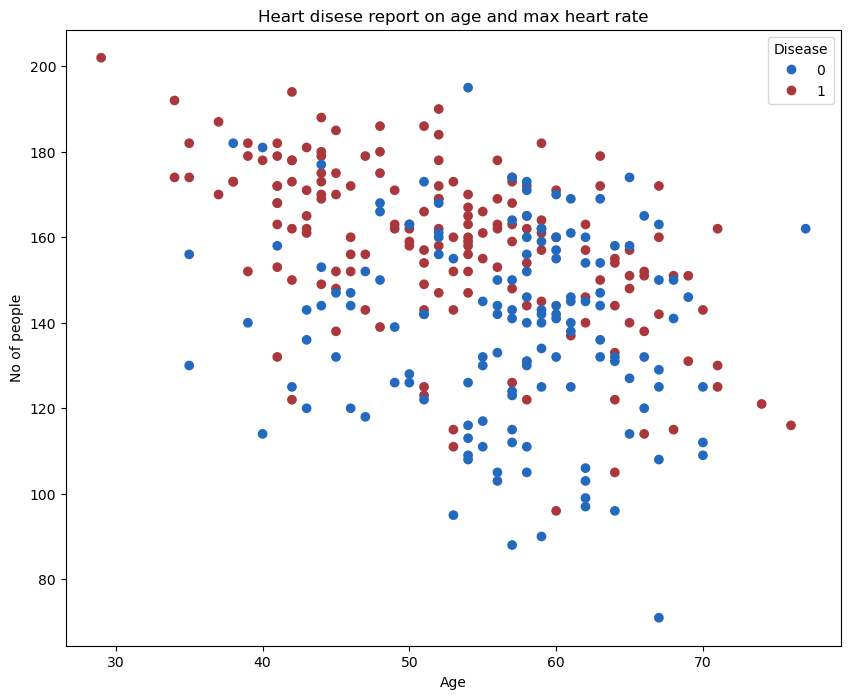

In [15]:
fig,ax=plt.subplots(figsize=(10,8))
scatter=ax.scatter(df.age,df.thalach,c=df.target,cmap="vlag")
ax.set(title="Heart disese report on age and max heart rate",xlabel="Age",ylabel="No of people")
ax.legend(*scatter.legend_elements(),title="Disease");

 ## finding patterns for cp and target`

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


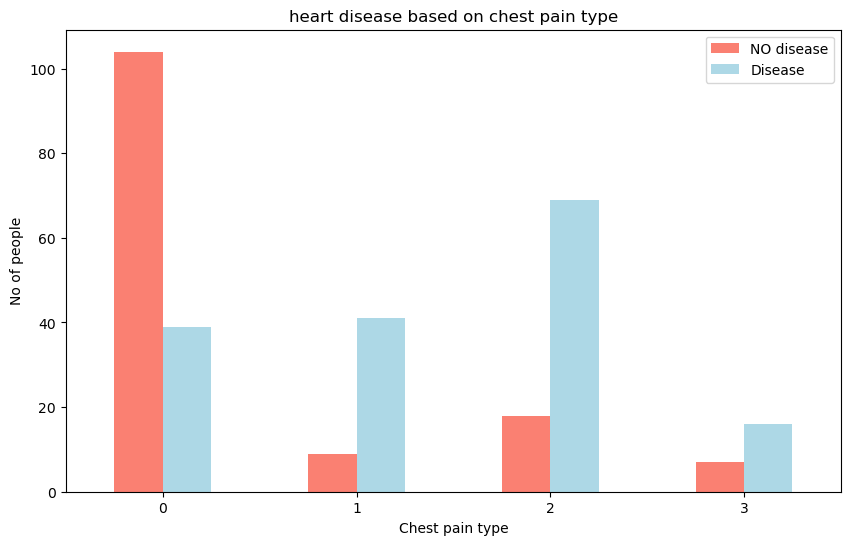

In [17]:
#visualizing in plot form
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease based on chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("No of people")
plt.legend(["NO disease","Disease"])
plt.xticks(rotation=0);

## Lets find the correlation among the columns and target:

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


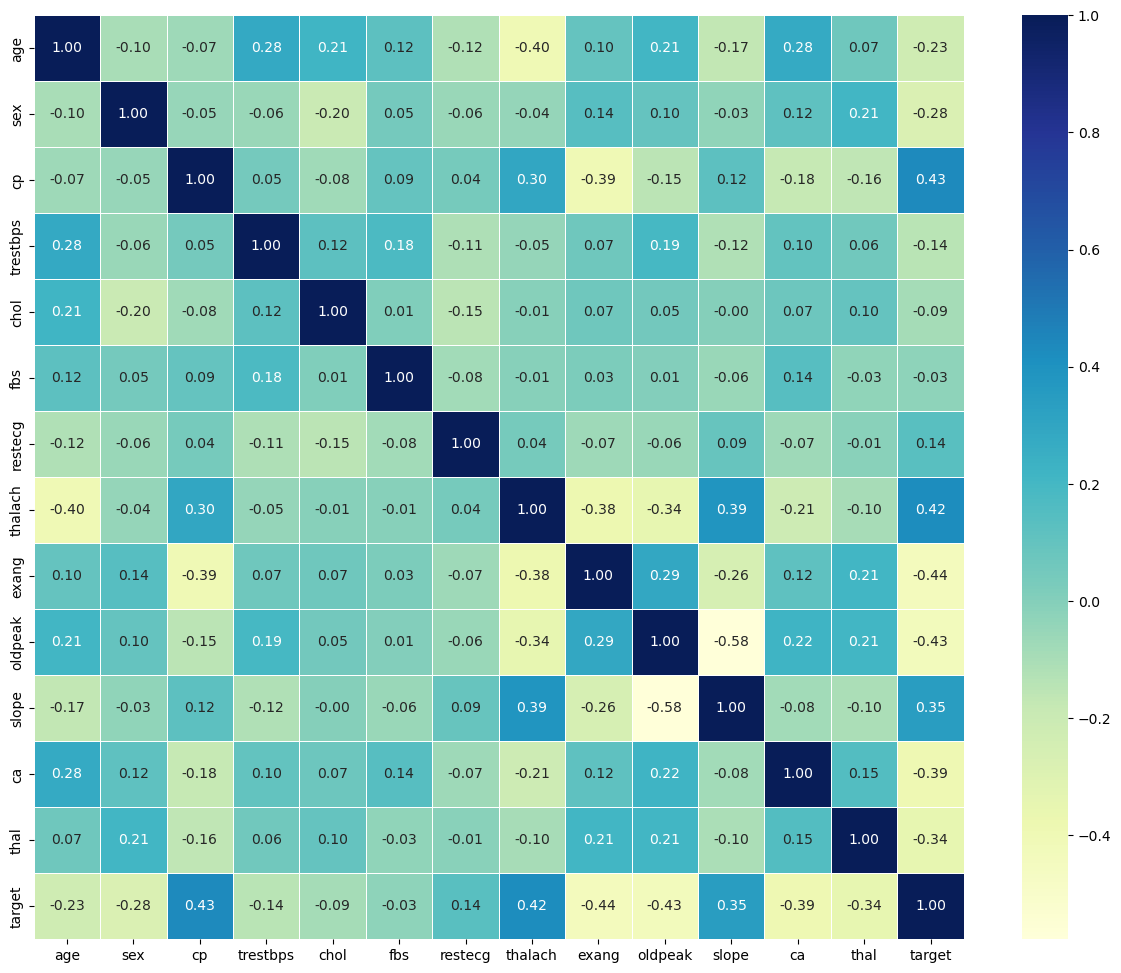

In [19]:
# lets visualize using seaborn's heatmap

corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,12))
ax=sns.heatmap(corr_mat,
           annot=True,
           cmap="YlGnBu",
           fmt="0.2f",
              linewidths=0.5);

## Lets split our data to start training and tesing

In [20]:
# splitting into x and y
x=df.drop("target",axis=1)
y=df.target

#split data into training and test data
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2)

In [21]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [22]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## training the data 
## testing by using various machine learing models 
we re using 3 various models:
1. LogisticRegression
2. K-Nearest-Neighbours
3. RandomForestClassifier

In [23]:
models={"LogisticRegressin":LogisticRegression(), "KNN": KNeighborsClassifier() ,"Random Forest" : RandomForestClassifier()}

#defining a function to fit and test the data by various methods

def fit_and_score(estimators,x_train,x_test,y_train,y_test):
    """
    fitting the data and testing by various machine learning estimators/models
    estimators: machine learning models/algorithms
    x_train : training data(no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #fitting the model
    np.random.seed(42)
    model_scores={}
    for name, model in estimators.items():
        model.fit(x_train,y_train)
        #testing the data and appending to new dictionary
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(estimators=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegressin': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

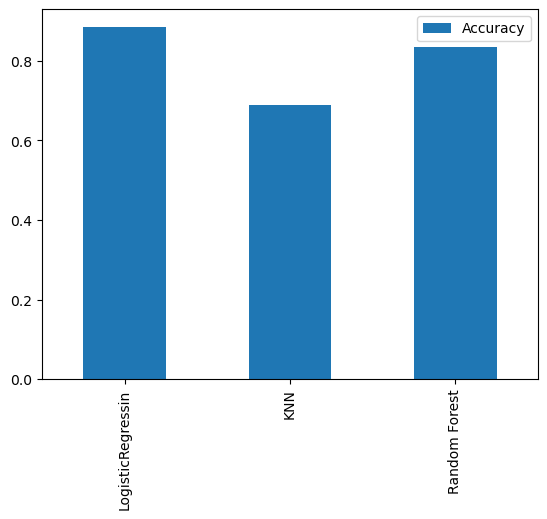

In [25]:
pd.DataFrame(model_scores,index=["Accuracy"]).T.plot(kind="bar");

## Parameters tuning to get better outcomes from models

* Hyperparameters tuning
* features
* accuracy
* Precision
* F1 score
* REcall
* classification report
* confusion matrix
* cross-validation
* ROC curve
* area under curve (AUC)

## KNN tuning

In [26]:
train_scores=[]
test_scores=[]

neighbors= range(1,21)
np.random.seed(42)
knn=KNeighborsClassifier()


for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))


In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max accuracy of knn 75.41%


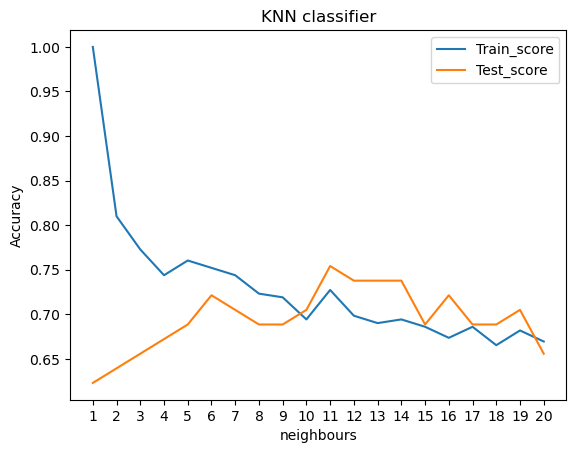

In [29]:
plt.plot(neighbors,train_scores,label="Train_score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.title("KNN classifier")
plt.xticks(range(1,21,1))
plt.xlabel("neighbours")
plt.ylabel("Accuracy")
plt.legend()
print(f"Max accuracy of knn {max(test_scores)*100:.2f}%")

## NOW we tune using RadomizedSearchCV for

1. LogisticRegression
2. RandomForestClassifier

In [30]:
# parameters for logisticregression for RandomizedSearchCV
lg_rs={"penalty":["l2"],
      "C":np.logspace(-2,4,60),
      "solver":["newton-cg", "newton-cholesky","sag","saga"],
      "max_iter":np.arange(5000,10000,1000),"n_jobs":[-1]}
#parameters for logisticregression for gridsearchcv

lg_grid={"penalty":["l2"],
      "C":np.logspace(-2,2,10),
      "solver":["newton-cg", "newton-cholesky", "sag","saga"],
      "max_iter":np.arange(5000,10000,2000),"n_jobs":[-1]}

# parameter for RandomForestClassifier for RandomizedSearchCV

rs_rf ={"n_estimators":np.arange(80,500,80),
       "max_depth":[None,2,3],
       "max_features":["sqrt","log2",None],
       "min_samples_split":np.arange(2,10,2),
       "min_samples_leaf":np.arange(1,10,3)}

# Parameters for RandomForestClassifier for GridSearachCv

rf_grid={"n_estimators":np.arange(80,500,80),
       "max_depth":[None,2,3],
       "max_features":["sqrt","log2",None],
       "min_samples_split":np.arange(2,10,2),
       "min_samples_leaf":np.arange(1,10,3)}



In [31]:
## tuning Logisticregression by Randomsearch
lr=LogisticRegression()
np.random.seed(42)

rs=RandomizedSearchCV(estimator=lr,param_distributions=lg_rs,
                     n_iter=100,
                     cv=5,
                     verbose=2)
rs.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=7912.342618981326, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=235.98334667821936, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.8s
[CV] END C=235.98334667821936, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.4s
[CV] END C=235.98334667821936, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=235.98334667821936, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=  

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.4237587160604063, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.4237587160604063, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.4237587160604063, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.4237587160604063, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=760.9496685459883, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=760.9496685459883, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=760.9496685459883, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=760.9496685459883, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=760.9496685459883, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.0811807510766078, max_iter=7000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.0811807510766078, max_iter=7000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.0811807510766078, max_iter=7000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.0811807510766078, max_iter=7000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.406236427773573, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.406236427773573, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.406236427773573, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.406236427773573, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.406236427773573, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=73.18242219076181, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=73.18242219076181, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=73.18242219076181, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=73.18242219076181, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=73.18242219076181, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=147.73776525985127, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=147.73776525985127, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=147.73776525985127, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=147.73776525985127, max_iter=9000,

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.3664483492953259, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.3664483492953259, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.8554672535565685, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8554672535565685, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8554672535565685, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8554672535565685, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.8554672535565685, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=11.242100350620873, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=11.242100350620873, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=11.242100350620873, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=11.242100350620873, ma

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=45.81597669054491, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=45.81597669054491, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=45.81597669054491, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=45.81597669054491, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=45.81597669054491, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=8.895134973108236, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=8.895134973108236, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=8.895134973108236, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=8.895134973108236, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.3664483492953259, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.3664483492953259, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.3664483492953259, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.02018760254679039, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.02018760254679039, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.02018760254679039, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.02018760254679039, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.02018760254679039, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.4237587160604063, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cholesky

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5355666917706899, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5355666917706899, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5355666917706899, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5355666917706899, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5355666917706899, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5355666917706899, max_iter=8000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.012638482029342979, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.012638482029342979, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.012638482029342979, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.012638482029342979, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total t

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1660882782627716, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.1660882782627716, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.1660882782627716, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1660882782627716, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=45.81597669054491, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=45.81597669054491, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=45.81597669054491, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=45.81597669054491, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=45.81597669054491, max_iter=9000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4953.53520895918, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4953.53520895918, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4953.53520895918, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4953.53520895918, max_iter=8000, n_j

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.6768750009458534, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.6768750009458534, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0650967523045817, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0650967523045817, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0650967523045817, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0650967523045817, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0650967523045817, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total tim

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=602.0894493336137, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=602.0894493336137, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=602.0894493336137, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=602.0894493336137, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=7912.342618981326, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=7912.342618981326, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=7912.342618981326, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.103979841848149, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.103979841848149, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.103979841848149, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.103979841848149, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.103979841848149, max_iter=9000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=186.71810912919207, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=186.71810912919207, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=186.71810912919207, max_iter=6000, n_jobs=-1, penalty=l2, solver=newton-cg; total 

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1536.1749466718297, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1536.1749466718297, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1536.1749466718297, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1536.1749466718297, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1536.1749466718297, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=11.242100350620873, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.242100350620873, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.242100350620873, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.242100350620873, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=11.242100350620873, max_iter=8000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=3.4863652276780877, max_iter=8000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3.4863652276780877, max_iter=8000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=3.4863652276780877, max_iter=8000, n_jobs=-1, penalty=l2, so

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1215.4742500762884, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1215.4742500762884, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1215.4742500762884, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1215.4742500762884, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1215.4742500762884, max_iter=6000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=22.695105366946706, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=22.695105366946706, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=22.695105366946706, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=22.695105366946706, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=22.695105366946706, max_iter=7000, n_jobs=-1, penalty=l2, solver=sag; total time=   

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-02, 1.26384820e-02, 1.59731228e-02, 2.01876025e-02,
       2.55140652e-02, 3.22459055e-02, 4.07539297e-02, 5.15067808e-02,
       6.50967523e-02, 8.22724134e-02, 1.03979842e-01, 1.31414736e-01,
       1.66088278e-01, 2.09910372e-01, 2.65294846e-01, 3.35292415e-01,
       4.23758716e-...
       2.98247129e+02, 3.76939098e+02, 4.76393801e+02, 6.02089449e+02,
       7.60949669e+02, 9.61724871e+02, 1.21547425e+03, 1.53617495e+03,
       1.94149195e+03, 2.45375111e+03, 3.10116893e+03, 3.91940677e+03,
       4.95353521e+03, 6.26051657e+03, 7.91234262e+03, 1.00000000e+04]),
                                        'max_iter': array([5000, 6000, 7000, 8000, 9000]),
                                        'n_jobs': [-1], 'penalty': ['l2'],
                                        'solver': ['newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=2)

In [32]:
rs.best_params_

{'solver': 'sag',
 'penalty': 'l2',
 'n_jobs': -1,
 'max_iter': 7000,
 'C': 0.8554672535565685}

In [33]:

rs.score(x_test,y_test)

0.8852459016393442

In [34]:
model_scores

{'LogisticRegressin': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [35]:
## tuning Logisticregression by Randomsearch
lr=LogisticRegression()
np.random.seed(42)

gd=GridSearchCV(estimator=lr,param_grid=lg_grid,
                     cv=12,
                     verbose=2)
gd.fit(x_train,y_train)

Fitting 12 folds for each of 120 candidates, totalling 1440 fits
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=5000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.21544346900318834, max_iter=7000, n_jobs=-1,

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.5994842503189409, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=0.599484250318940

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.6681005372000592, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.6681005372000592, max_iter=7000, n_job

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.6415888336127775, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=4.641588833612777

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=12.915496650148826, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=12.91549665014882

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=35.93813663804626, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=35.93813663804626, max_iter=7000, n_jobs=-1, pena

/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=sag; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=5000, n_jobs=-1, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s


/Users/gunuruchaitanyakumar/Desktop/ml_course/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END C=100.0, max_iter=7000, n_jobs=-1, pe

GridSearchCV(cv=12, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'max_iter': array([5000, 7000, 9000]), 'n_jobs': [-1],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'newton-cholesky', 'sag',
                                    'saga']},
             verbose=2)

In [36]:
gd.score(x_train,y_train),gd.score(x_test,y_test)

(0.859504132231405, 0.8852459016393442)

In [37]:
## Tuning Random Forest using Random Search

np.random.seed(42)

model=RandomForestClassifier(n_jobs=-1)

model_rs=RandomizedSearchCV(model,param_distributions=rs_rf,
                           cv=10,
                           n_iter=30,
                           verbose=2)

model_rs.fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; total time=   0.4s
[CV] END max_depth=3, max_features=None, min_samples_leaf=7, min_samples_split=4, n_estimators=480; tota

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 2, 3],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 4, 7]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 80, 160, 240, 320, 400, 480])},
                   verbose=2)

In [38]:
model_rs.score(x_train,y_train),model_rs.score(x_test,y_test)

(0.8553719008264463, 0.8688524590163934)

In [39]:
## Tuning Random Forest using GridSearchCV

np.random.seed(42)

model_grid=GridSearchCV(model,param_grid=rf_grid,
                       cv=5,
                       verbose=2)

model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=160; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([1, 4, 7]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 80, 160, 240, 320, 400, 480])},
             verbose=2)

In [40]:
model_grid.score(x_train,y_train),model_grid.score(x_test,y_test)

(0.8636363636363636, 0.8688524590163934)

## ROC curve

In [46]:
y_preds=model_grid.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

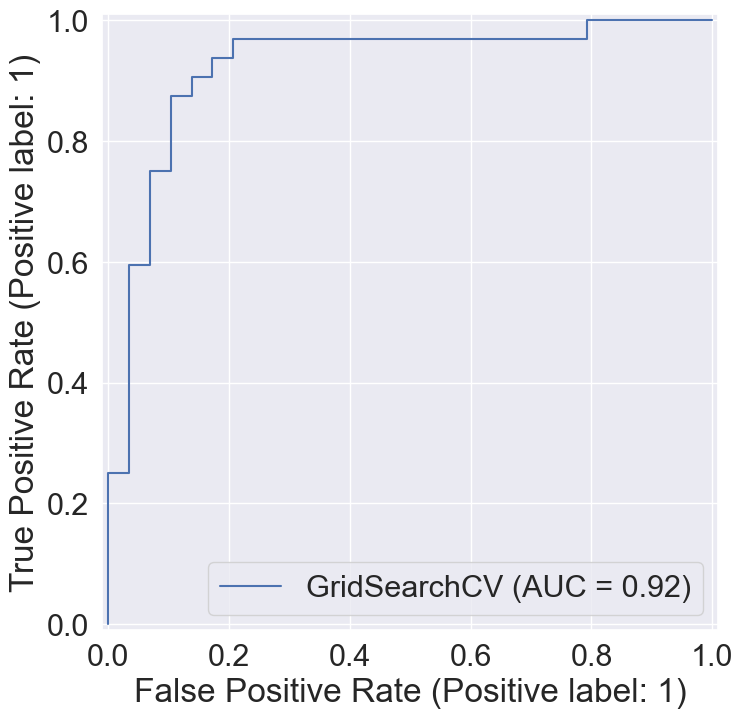

In [128]:
fig,ax=plt.subplots(figsize=(12,8))
%matplotlib inline
RocCurveDisplay.from_estimator(model_grid,x_test,y_test,ax=ax);

## confusion matrix

In [56]:
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 3, 29]])

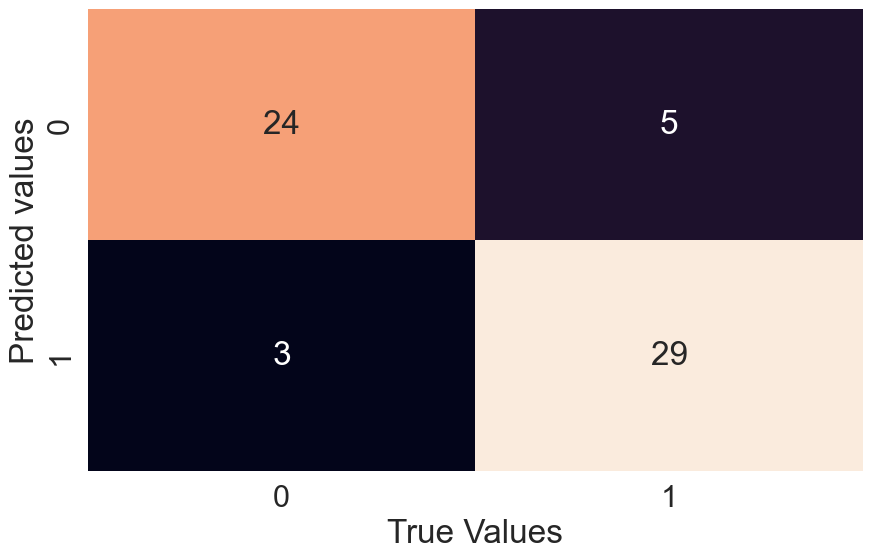

In [68]:
## let's visualize:

def plot_conf_mat(y_test,y_preds):
    """
    lets plot the seaborn's heat map for visualizing
    """
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
               annot=True,
               cbar=False)
    sns.set(font_scale=2)
    ax.set(xlabel="True Values",ylabel="Predicted values")
plot_conf_mat(y_test,y_preds)

## Classification_report

In [71]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [76]:
## using cross-VAl
##cross-val-accuracy
np.random.seed(42)
cv_acc=cross_val_score(model,
                      x,
                      y,
                      cv=5)
cv_acc=np.mean(cv_acc)
print(cv_acc)

0.8248087431693989


In [78]:
## cross_val for precision
np.random.seed(42)
cv_precision=cross_val_score(model,
                            x,
                            y,
                            cv=5,
                            scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8329547346025924

In [79]:
## cross_val for recall

np.random.seed(42)
cv_recall=cross_val_score(model,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8545454545454545

In [80]:
## cross_val for f1

np.random.seed(42)
cv_f1=cross_val_score(model,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8426854603423344

In [81]:
cv_map=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,
                    "Recall":cv_recall,
                    "F1":cv_f1},index=[0])
cv_map

,Accuracy,Precision,Recall,F1
0,0.824809,0.832955,0.854545,0.842685


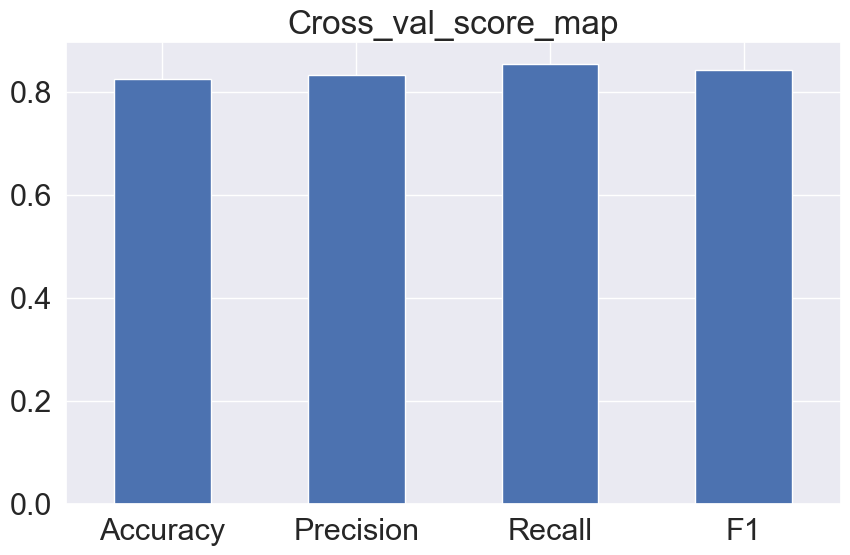

In [89]:
cv_map.T.plot(kind="bar",title="Cross_val_score_map",figsize=(10,6),rot=0,legend=0);

## Feature Importance 

It is different for different machine learning models
we have to make research on it.
like we can see correlation matrix for it or `coef_ ` for LogisticRegression

In [100]:
lr=LogisticRegression(solver='sag',
             penalty= 'l2',
             n_jobs= -1,
             max_iter= 7000,
             C= 0.8554672535565685)
np.random.seed(42)
lr.fit(x_train,y_train)
lr.coef_


array([[ 0.00129416, -0.55831933,  0.64761966, -0.01138103, -0.00136409,
         0.0181992 ,  0.16131336,  0.02358494, -0.42480397, -0.61503451,
         0.32355593, -0.60230461, -0.56290121]])

In [104]:
coef_dict=dict(zip(df.columns,lr.coef_[0]))
coef_dict

{'age': 0.0012941606595268608,
 'sex': -0.5583193260730621,
 'cp': 0.6476196620268146,
 'trestbps': -0.011381032827563049,
 'chol': -0.0013640882785136631,
 'fbs': 0.01819919520103918,
 'restecg': 0.16131336230065074,
 'thalach': 0.023584938526765624,
 'exang': -0.4248039658834856,
 'oldpeak': -0.6150345134270817,
 'slope': 0.32355592640419295,
 'ca': -0.6023046105879178,
 'thal': -0.5629012064280222}

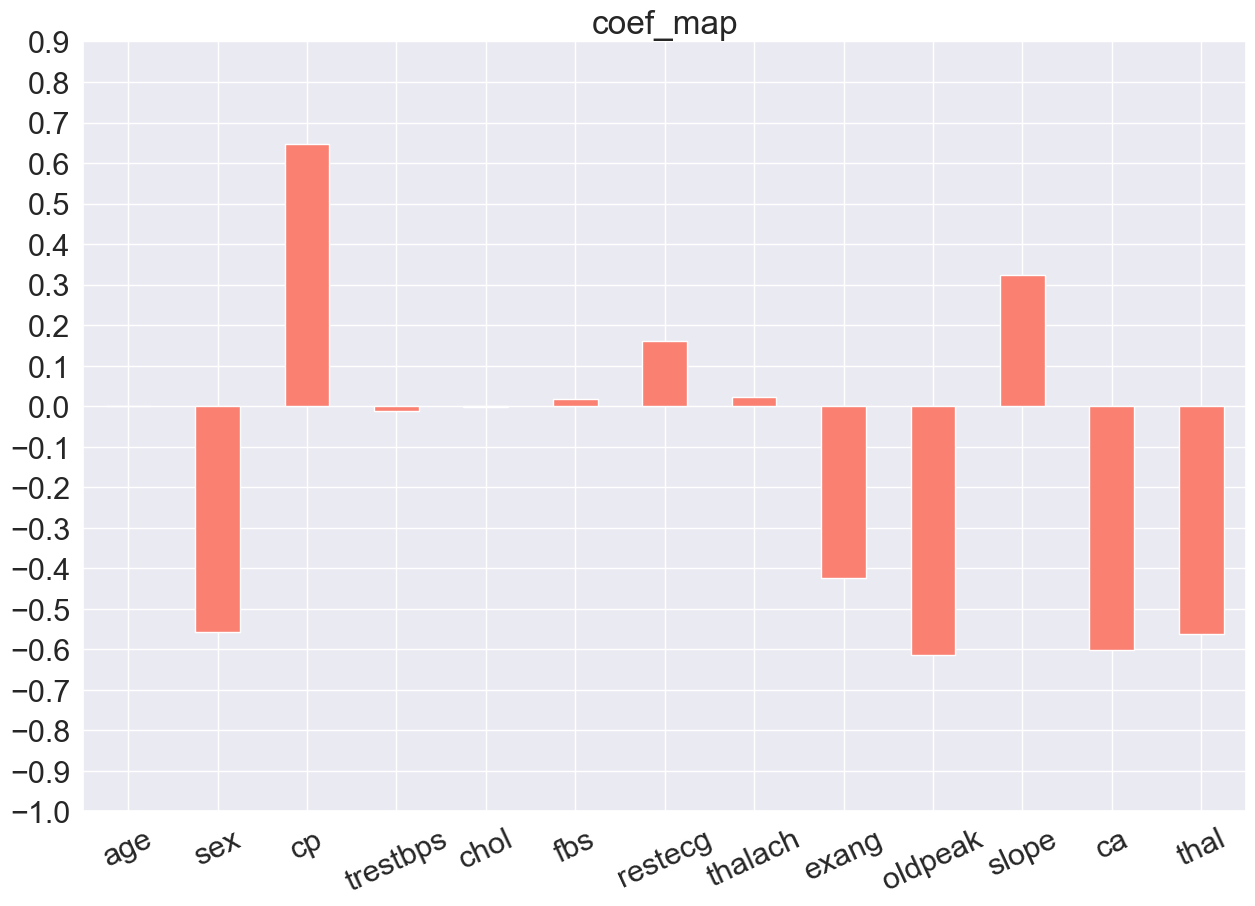

In [119]:
import pandas as pd
pd.DataFrame(coef_dict,index=[0]).T.plot(kind="bar",title="coef_map",legend=0,yticks=np.arange(-1,1,0.10),figsize=(15,10),rot=25,color="salmon");